In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Algerian_forest_fires_dataset_CLEANED.csv')

In [ ]:
X = df.drop('Classes',axis=1)
y= df['Classes']

In [ ]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=36)
X_train.shape, X_test.shape

((170, 14), (73, 14))

In [ ]:
def scaler_standard(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled

In [ ]:
X_train_scaled, X_test_scaled = scaler_standard(X_train, X_test)

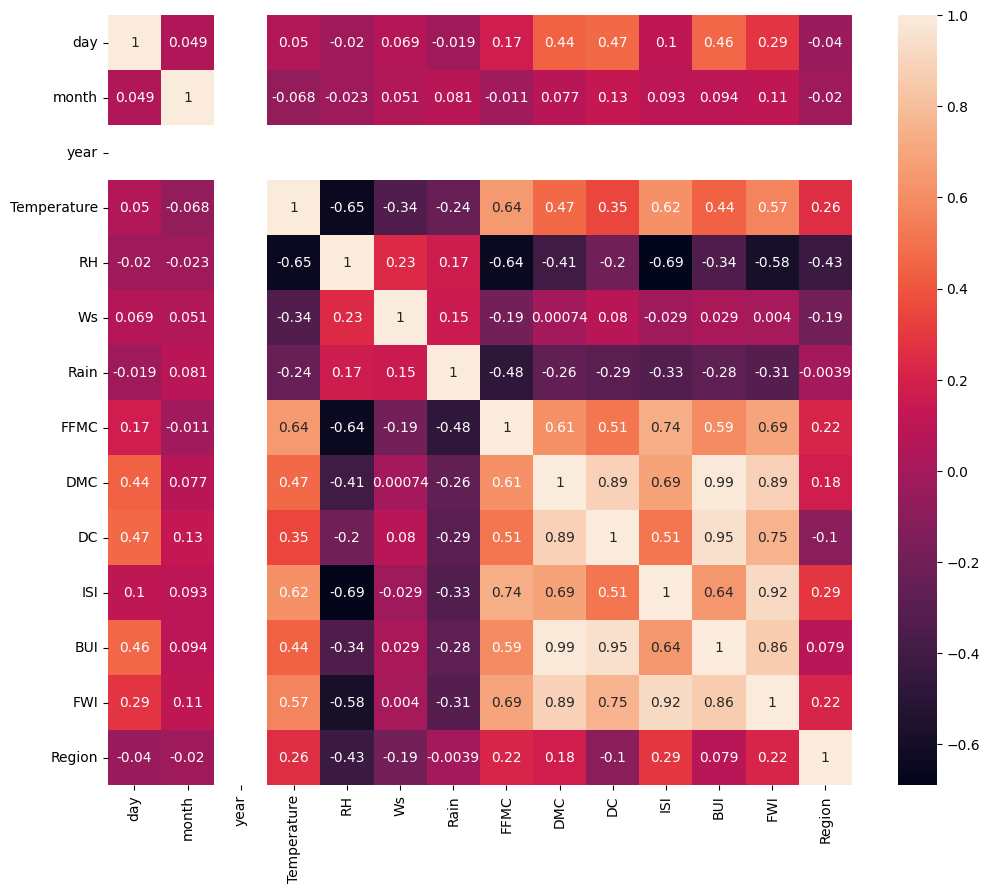

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True)
plt.show()

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X_train, 0.75)
corr_features

{'BUI', 'DC', 'FWI'}

In [ ]:
X_train.drop(corr_features,axis=1, inplace=True)
X_test.drop(corr_features,axis=1, inplace=True)
X_train.shape, X_test.shape

((170, 11), (73, 11))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, 30, None],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at a leaf node
}

# Initialize the RandomForestClassifier
rfc = RandomForestClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model with hyperparameter tuning
grid_search.fit(X_train_scaled, y_train)

# Get the best estimator
best_rfc = grid_search.best_estimator_

# Predict on the test data
rfc_pred = best_rfc.predict(X_test_scaled)

# Calculate accuracy and classification report
score = accuracy_score(y_test, rfc_pred)
cr = classification_report(y_test, rfc_pred)

print("Random Forest with Hyperparameter Tuning")
print("Accuracy Score value: {:.4f}".format(score))
print(cr)

# Best parameters found by GridSearch
print("Best hyperparameters: ", grid_search.best_params_)


Random Forest with Hyperparameter Tuning
Accuracy Score value: 0.9589
              precision    recall  f1-score   support

        fire       1.00      0.94      0.97        48
    not fire       0.89      1.00      0.94        25

    accuracy                           0.96        73
   macro avg       0.95      0.97      0.96        73
weighted avg       0.96      0.96      0.96        73

Best hyperparameters:  {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled,y_train)
rfc_pred = rfc.predict(X_test_scaled)
score = accuracy_score(y_test,rfc_pred)






cr = classification_report(y_test,rfc_pred)

print("Random Forest")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

Random Forest
Accuracy Score value: 0.9589
              precision    recall  f1-score   support

        fire       1.00      0.94      0.97        48
    not fire       0.89      1.00      0.94        25

    accuracy                           0.96        73
   macro avg       0.95      0.97      0.96        73
weighted avg       0.96      0.96      0.96        73



In [ ]:
from sklearn.metrics import mean_squared_error
msq = mean_squared_error(y_test,rfc_pred)
print("Mean Square Er: ",msq)


ValueError: could not convert string to float: 'fire'

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,mean_squared_error

# Initialize the Support Vector Classifier
svc = SVC()

# Fit the model on the scaled training data
svc.fit(X_train_scaled, y_train)

# Predict on the scaled test data
svc_pred = svc.predict(X_test_scaled)


# Generate the classification report
cr = classification_report(y_test, svc_pred)
print(cr)



# Calculate the accuracy score
score = accuracy_score(y_test, svc_pred)

# Print the results
print("Support Vector Machine")
print("Accuracy Score value: {:.4f}".format(score))



Support Vector Machine
Accuracy Score value: 0.9178
              precision    recall  f1-score   support

        fire       0.94      0.94      0.94        48
    not fire       0.88      0.88      0.88        25

    accuracy                           0.92        73
   macro avg       0.91      0.91      0.91        73
weighted avg       0.92      0.92      0.92        73



In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto', 0.1, 1, 10],  # Kernel coefficient for 'rbf'
    'kernel': ['linear', 'rbf', 'poly']  # Different kernels
}

# Initialize SVC
svc = SVC()

# Perform grid search
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best estimator
best_svc = grid_search.best_estimator_

# Predict on the test data
svc_pred = best_svc.predict(X_test_scaled)

# Calculate the accuracy score
score = accuracy_score(y_test, svc_pred)

# Generate the classification report
cr = classification_report(y_test, svc_pred)

# Print the results
print("Support Vector Machine with Hyperparameter Tuning")
print("Accuracy Score value: {:.4f}".format(score))
print(cr)

# Best hyperparameters found
print("Best hyperparameters: ", grid_search.best_params_)


Support Vector Machine with Hyperparameter Tuning
Accuracy Score value: 0.9726
              precision    recall  f1-score   support

        fire       1.00      0.96      0.98        48
    not fire       0.93      1.00      0.96        25

    accuracy                           0.97        73
   macro avg       0.96      0.98      0.97        73
weighted avg       0.97      0.97      0.97        73

Best hyperparameters:  {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
